In [131]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv


This research aims to identify the most relevant risk factors for heart disease and predict the overall risk of developing heart disease within ten years using logistic regression.
> 
The dataset includes various independent variables (features) that are potential risk factors for heart disease. The target variable (dependent variable) is TenYearCHD, which indicates whether a patient will develop heart disease within ten years.

# ****Step 1: Data Processing

In [132]:
heart_disease=pd.read_csv("/kaggle/input/heart-disease-prediction-using-logistic-regression/framingham.csv")

In [133]:
heart_disease

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


In [134]:
heart_disease['cigsPerDay'].unique()

array([ 0., 20., 30., 23., 15.,  9., 10.,  5., 35., 43.,  1., 40.,  3.,
        2., nan, 12.,  4., 18., 25., 60., 14., 45.,  8., 50., 13., 11.,
        7.,  6., 38., 29., 17., 16., 19., 70.])

In [135]:
heart_disease['education'].unique()

array([ 4.,  2.,  1.,  3., nan])

In [136]:
heart_disease['age'].unique()

array([39, 46, 48, 61, 43, 63, 45, 52, 50, 41, 38, 42, 44, 47, 60, 35, 36,
       59, 54, 37, 56, 53, 49, 65, 51, 62, 40, 67, 57, 66, 64, 55, 58, 34,
       68, 33, 70, 32, 69])

In [137]:
heart_disease.corr()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


In [138]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [139]:
heart_disease.shape

(4238, 16)

In [140]:
heart_disease.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [141]:
missing_val_col=['education','BPMeds','cigsPerDay','totChol','BMI','heartRate','glucose']
heart_disease[missing_val_col]=heart_disease[missing_val_col].fillna(heart_disease[missing_val_col].median())

In [142]:
heart_disease.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [143]:
heart_disease.kurtosis()

male                -1.919033
age                 -0.989636
education           -0.655735
currentSmoker       -2.000387
cigsPerDay           1.047748
BPMeds              29.243466
prevalentStroke    164.721624
prevalentHyp        -1.329411
diabetes            33.948587
totChol              4.218585
sysBP                2.155019
diaBP                1.277100
BMI                  2.683554
heartRate            0.908440
glucose             64.957182
TenYearCHD           1.763428
dtype: float64

In [144]:
heart_disease.skew()

male                0.286135
age                 0.228146
education           0.697171
currentSmoker       0.023606
cigsPerDay          1.257472
BPMeds              5.588351
prevalentStroke    12.909062
prevalentHyp        0.819278
diabetes            5.994378
totChol             0.878718
sysBP               1.145362
diaBP               0.714102
BMI                 0.985442
heartRate           0.644608
glucose             6.541476
TenYearCHD          1.939741
dtype: float64

**Step 2 :EDA(Exploratory Data Analysis)**

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

In [146]:
heart_disease.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

<Axes: >

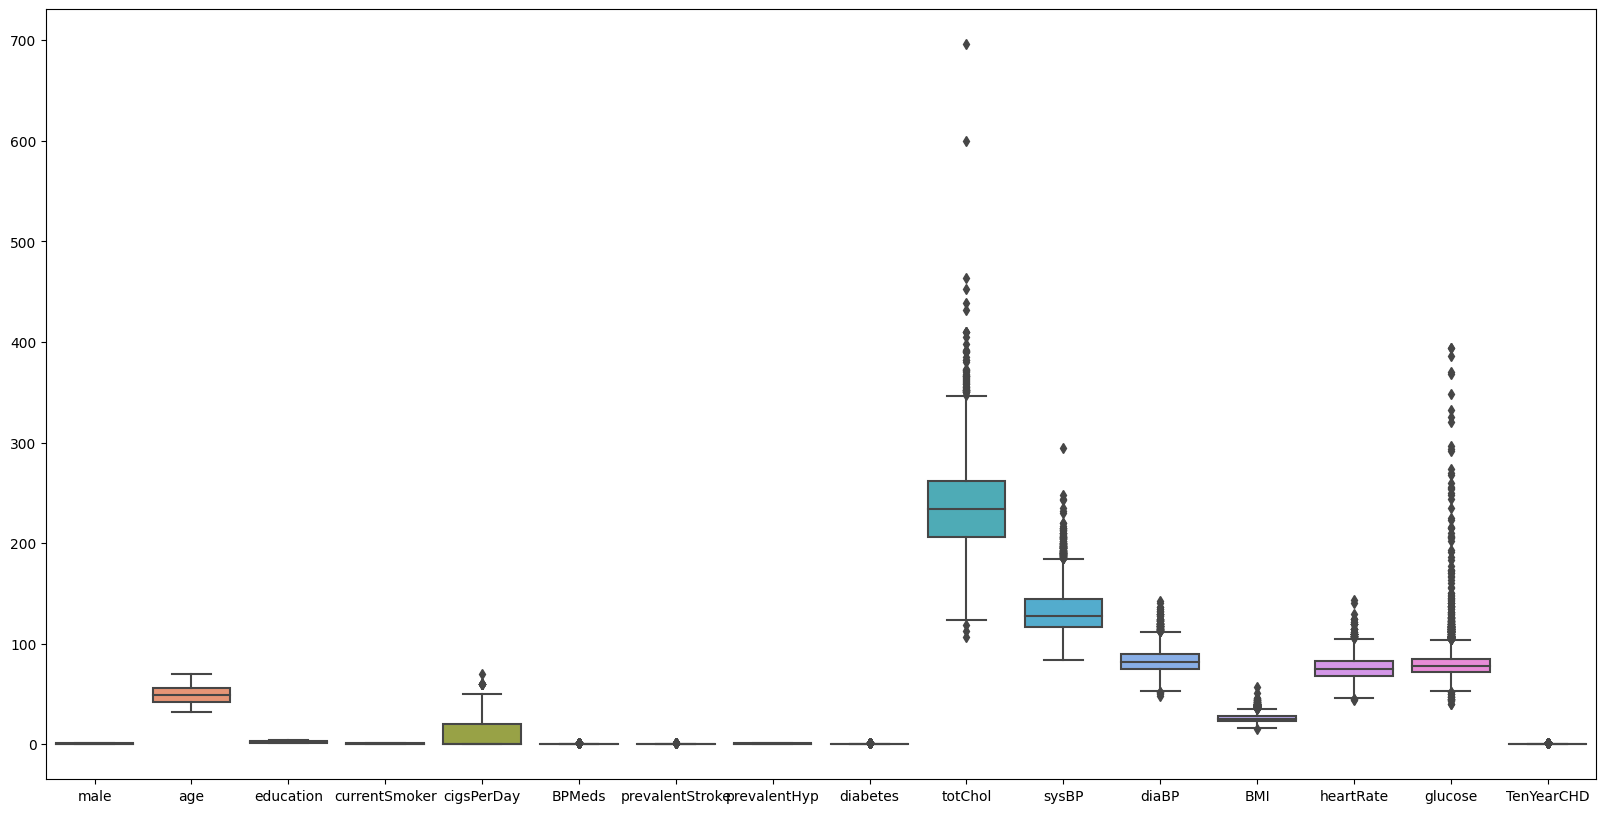

In [147]:
plt.figure(figsize=(20,10))
sns.boxplot(heart_disease)

<Axes: >

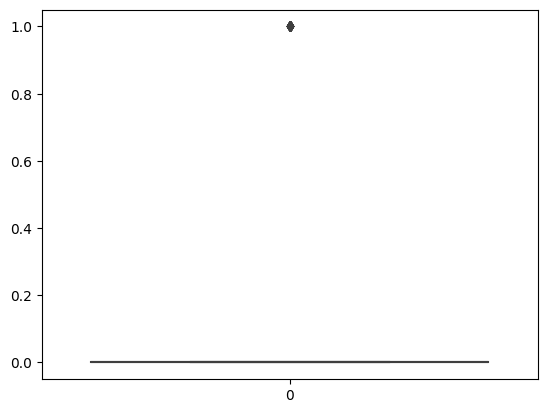

In [148]:
sns.boxplot(heart_disease['prevalentStroke'])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prevalentStroke', ylabel='Density'>

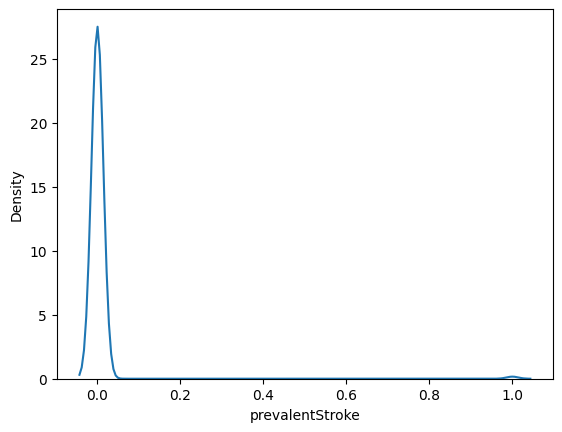

In [149]:
sns.kdeplot(heart_disease.prevalentStroke)


/tmp/ipykernel_32/4258611312.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart_disease.prevalentStroke)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prevalentStroke', ylabel='Density'>

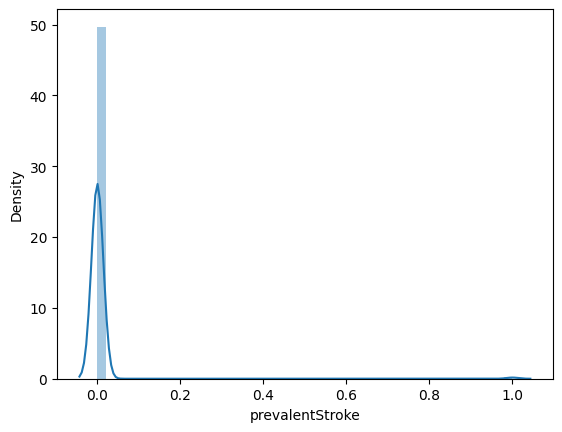

In [150]:
sns.distplot(heart_disease.prevalentStroke)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_32/3708985301.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  print(sns.distplot(heart_disease.BPMeds))


Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


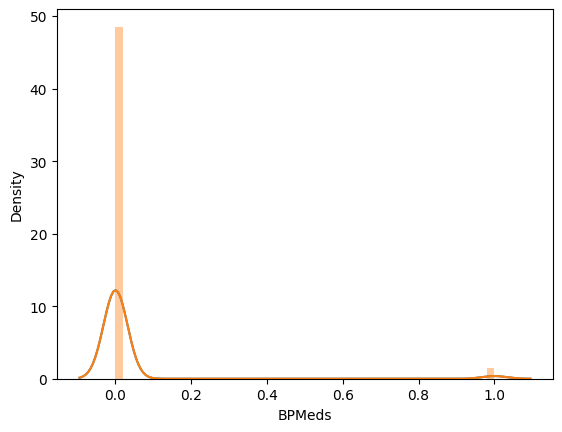

In [151]:
print(sns.kdeplot(heart_disease.BPMeds))

print(sns.distplot(heart_disease.BPMeds))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='diabetes', ylabel='Density'>

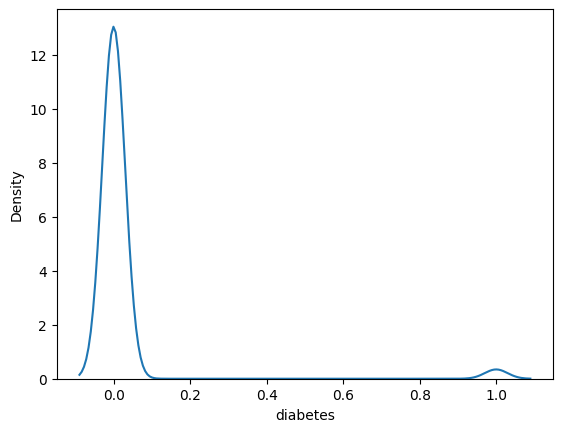

In [152]:
sns.kdeplot(heart_disease.diabetes)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='totChol', ylabel='Density'>

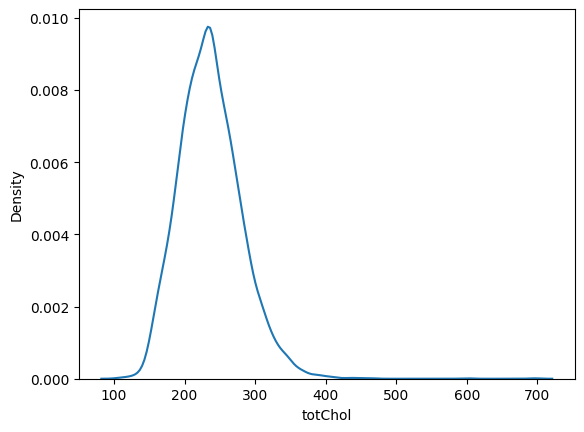

In [153]:
sns.kdeplot(heart_disease.totChol)


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='glucose', ylabel='Density'>

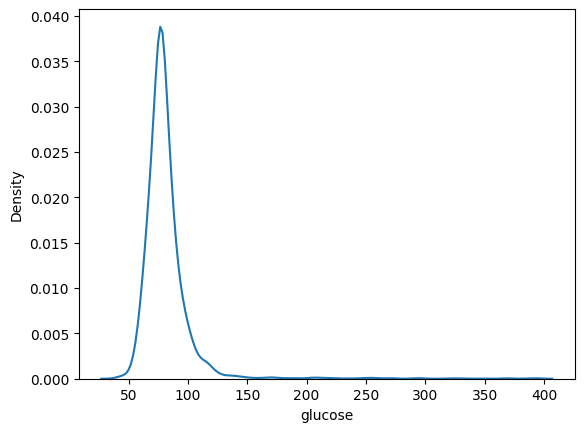

In [154]:
sns.kdeplot(heart_disease.glucose)

# Outlier Identification:


In [155]:
# Assuming 'df' is your DataFrame and these are the columns you are analyzing
outliers_column = ['glucose', 'totChol', 'diabetes', 'prevalentStroke', 'BPMeds']
df=heart_disease
# Function to calculate the number of outliers based on IQR
def calculate_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Dictionary to store the outliers for each column
outliers_dict = {}
outliers_count={}
# Calculate and store the outliers for each specified column
for column in outliers_column:
    outliers=calculate_outliers(df, column)
    outliers_dict[column] = outliers
    outliers_count[column]=outliers.shape[0]

# Print the outliers for each column
for column,outliers in outliers_dict.items():
    print(f"Number of outliers in '{column}': {outliers_count[column]}")
    print(f"Outliers in '{column}':")
    print(outliers)
    print()  # Add a blank line for better readability
    

Number of outliers in 'glucose': 262
Outliers in 'glucose':
      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
22       0   52        1.0              0         0.0     0.0   
37       1   52        1.0              0         0.0     0.0   
44       0   53        3.0              0         0.0     1.0   
65       0   63        1.0              0         0.0     0.0   
66       0   62        1.0              0         0.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4203     1   63        1.0              1        10.0     0.0   
4209     1   65        2.0              0         0.0     0.0   
4225     1   45        4.0              1        43.0     0.0   
4228     0   50        1.0              0         0.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
22                  0             0         0    234.0  148.0   78.0  34.17   
3

The given outliers do not provide valuable insights for the analysis, so we will keep them as they are. Since the values are neither extremely low nor extremely high, they may be considered measurement errors or data entry errors. 

In [156]:
# Columns to compare for the presence of zeros
columns_to_check = ['TenYearCHD', 'prevalentHyp', 'diabetes', 'BPMeds', 'prevalentStroke']

# Create a combined condition to check for zeros in all specified columns
combined_condition = (heart_disease[columns_to_check] == 0).all(axis=1)

# Filter the DataFrame based on the combined condition
rows_with_all_zeros = heart_disease[combined_condition]
rows_with_all_zeros

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4227,1,43,4.0,1,20.0,0.0,0,0,0,187.0,129.5,88.0,25.62,80.0,75.0,0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


We have a dataset with five columns, many of which contain rows with 0s. Dropping these rows would result in the loss of 2561 rows, leading to the deletion of relevant information crucial for training our logistic regression model. Since variables like ten-year CHD, diabetes, prevalent stroke, and BPMeds depend on this data, we will keep the 0 values intact. This approach ensures that we retain the integrity of the dataset and can still capture the essential patterns and relationships for our model.

# Data Visualization:

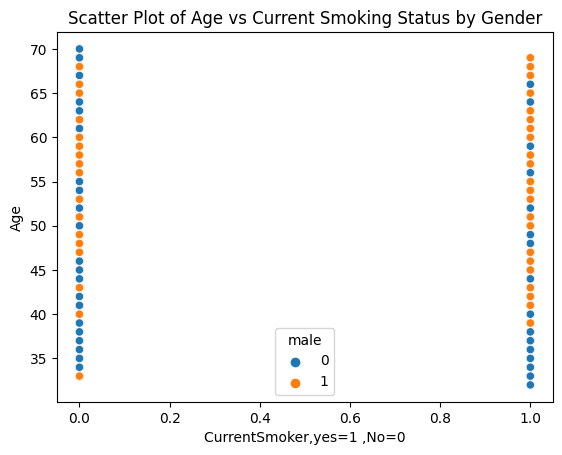

In [157]:
sns.scatterplot(x='currentSmoker',y='age',hue='male',data=heart_disease)
plt.title('Scatter Plot of Age vs Current Smoking Status by Gender')
plt.ylabel('Age')
plt.xlabel('CurrentSmoker,yes=1 ,No=0')
plt.show()

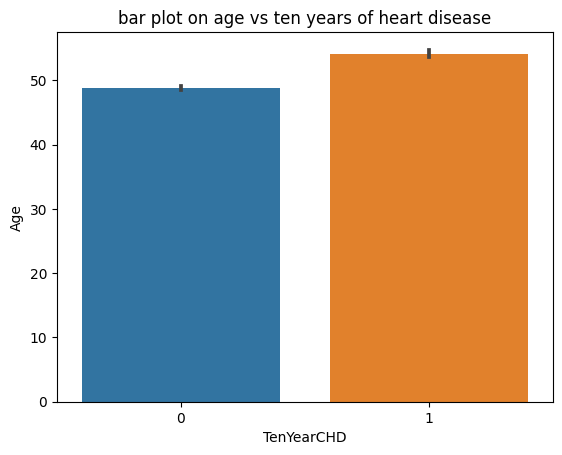

In [158]:
sns.barplot(x='TenYearCHD',y='age',data=heart_disease)
plt.title("bar plot on age vs ten years of heart disease")
plt.ylabel('Age')
plt.xlabel('TenYearCHD')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated a

<Figure size 2000x1000 with 0 Axes>

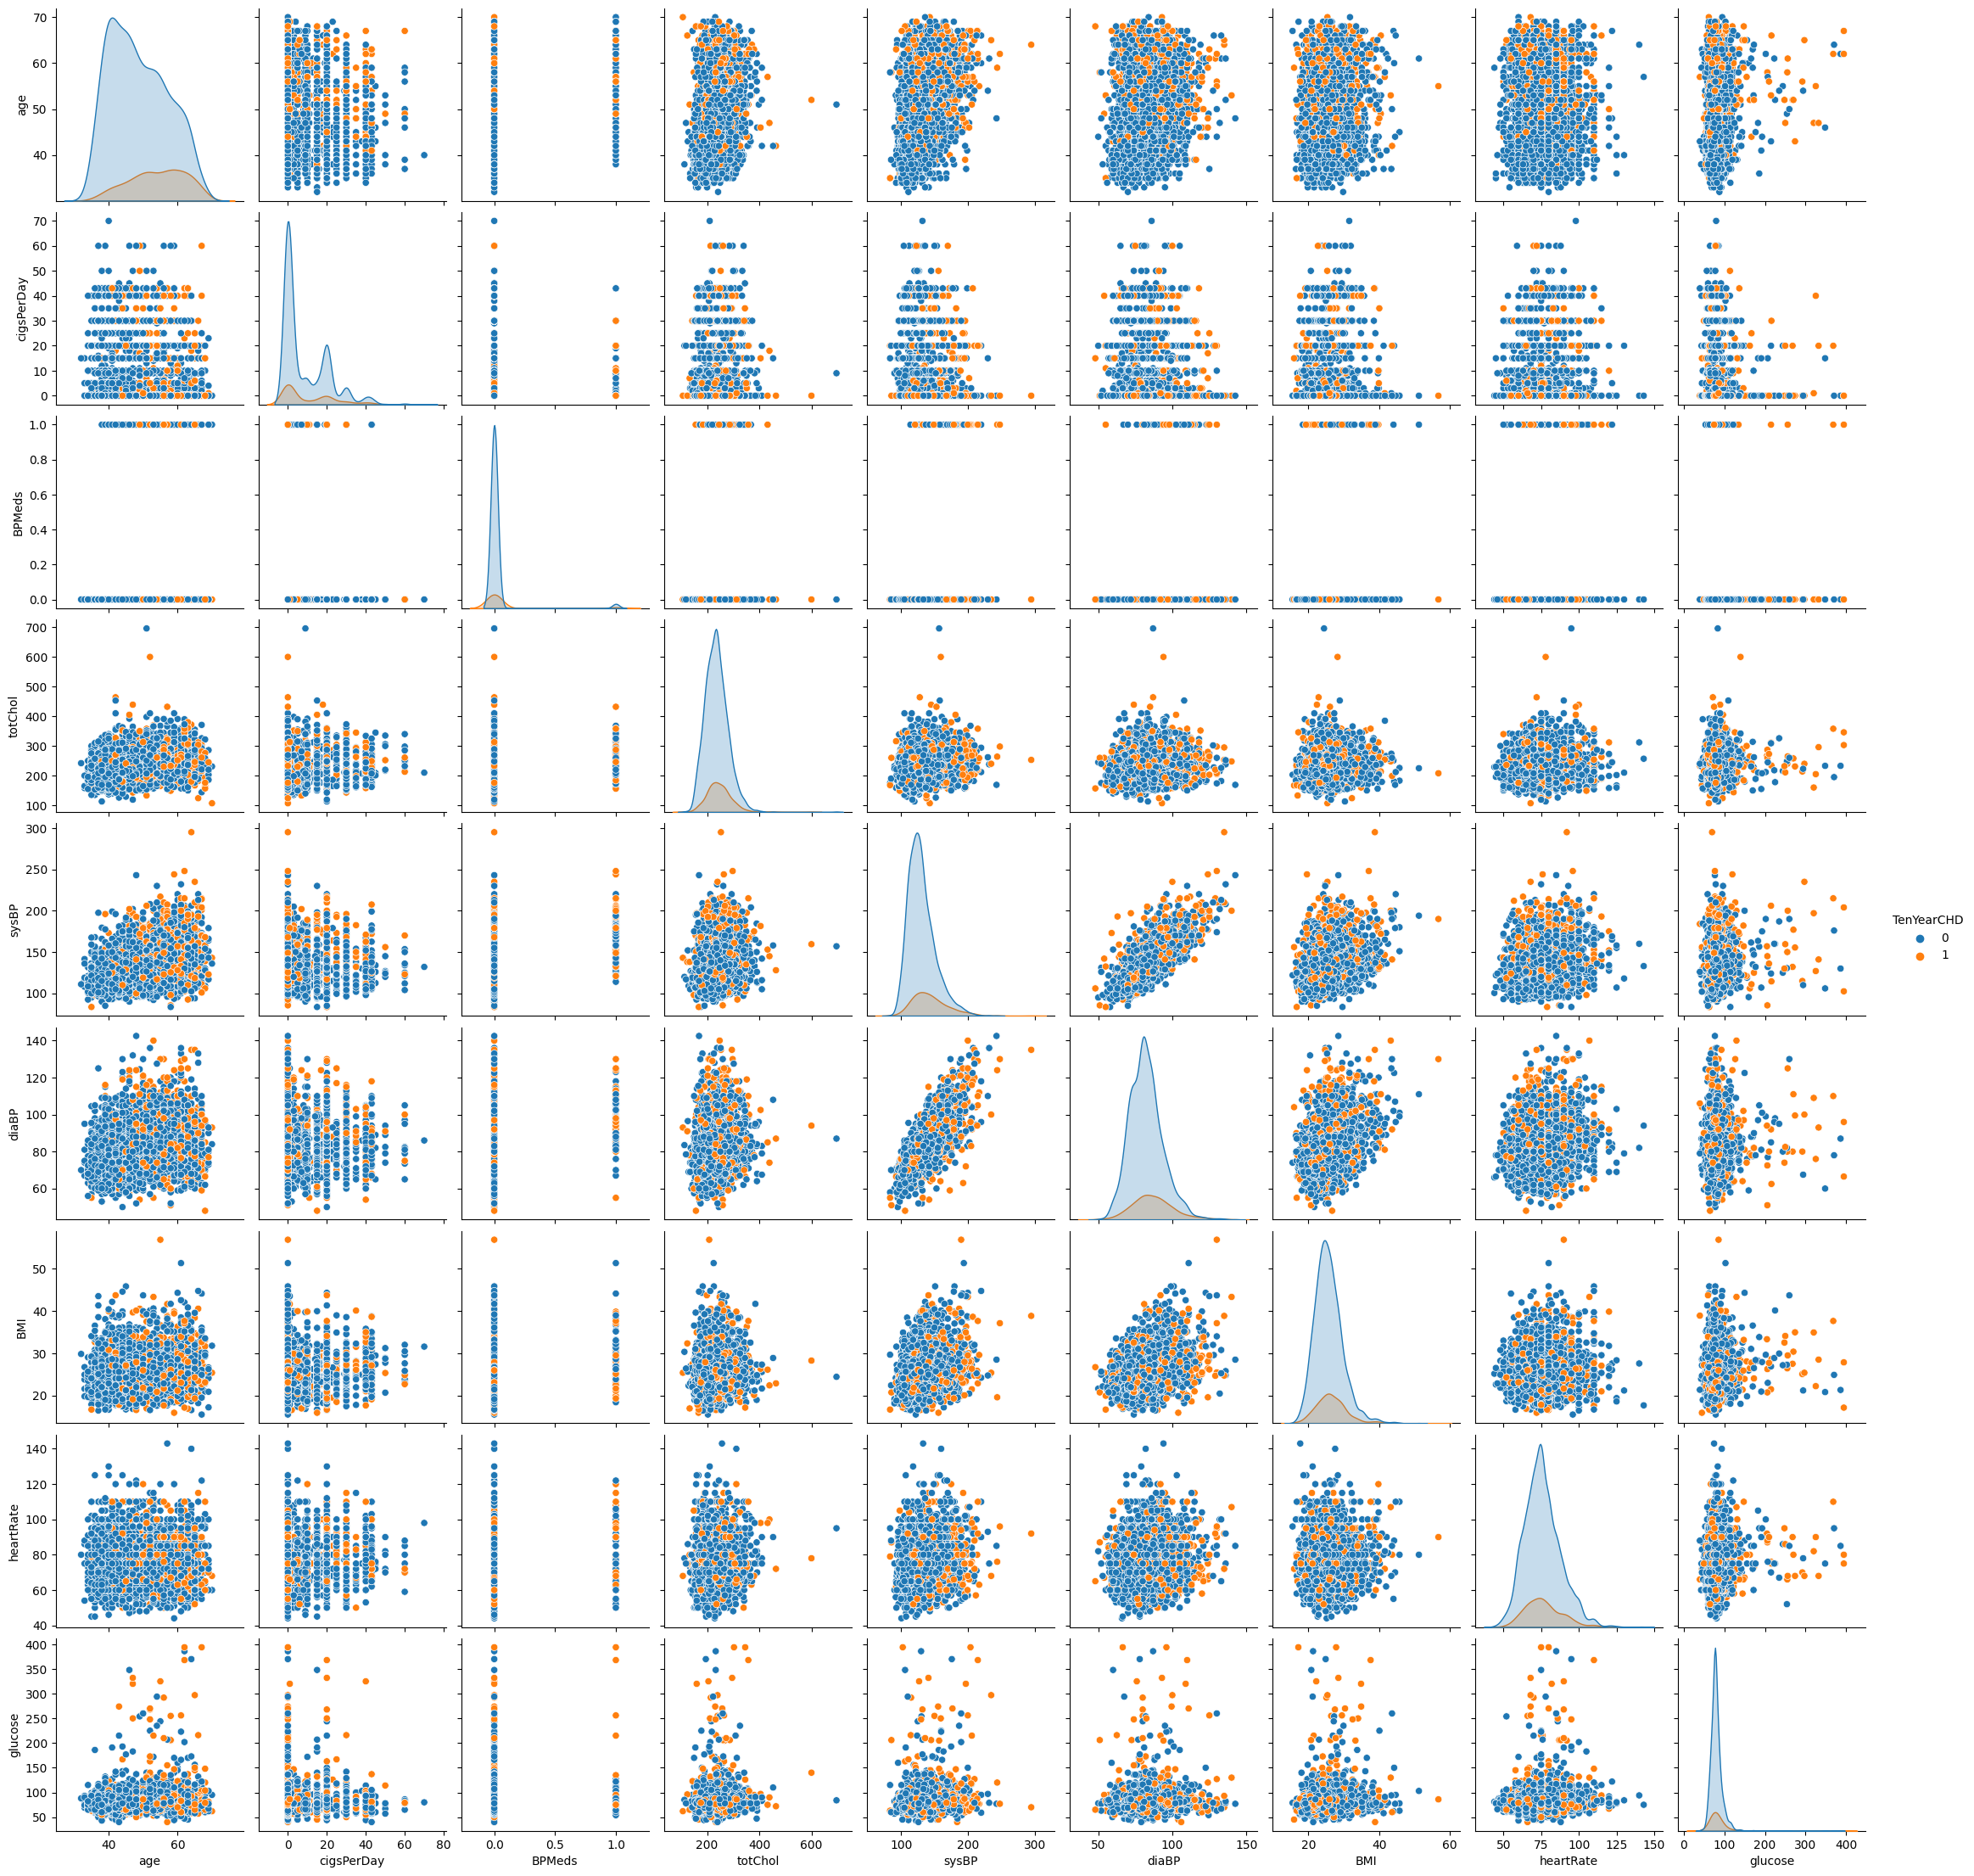

In [159]:
plt.figure(figsize=(20,10))
numerical_features=['age','cigsPerDay','BPMeds','totChol','sysBP','diaBP','BMI','heartRate','glucose','TenYearCHD']
sns.pairplot(heart_disease[numerical_features],hue='TenYearCHD')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

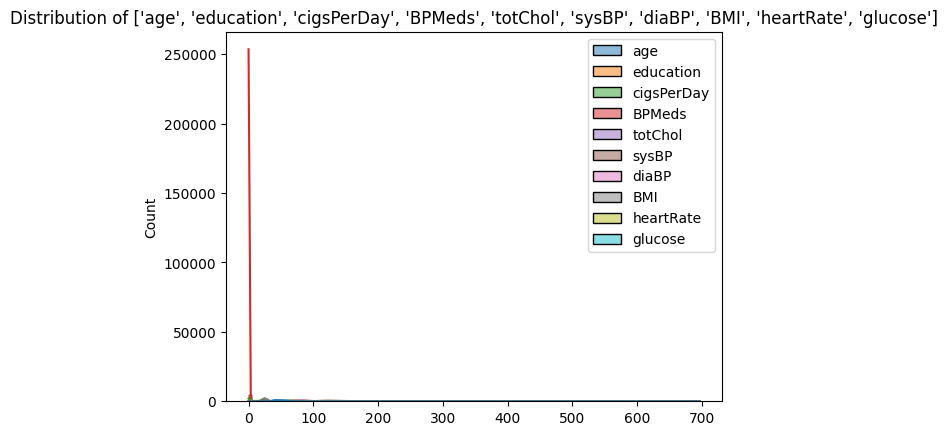

In [160]:
#distribution of numerical_features
num_features=['age','education','cigsPerDay','BPMeds','totChol','sysBP','diaBP','BMI','heartRate','glucose']
sns.histplot(heart_disease[num_features],kde=True)
plt.title(f"Distribution of {num_features}")
plt.show()

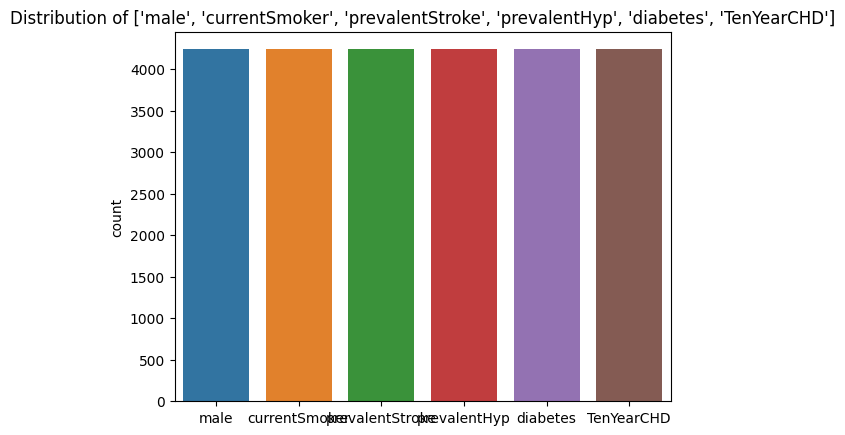

In [161]:
#distribution of categorical_features
cat_features=['male','currentSmoker','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']
sns.countplot(heart_disease[cat_features])
plt.title(f"Distribution of {cat_features}")
plt.show()

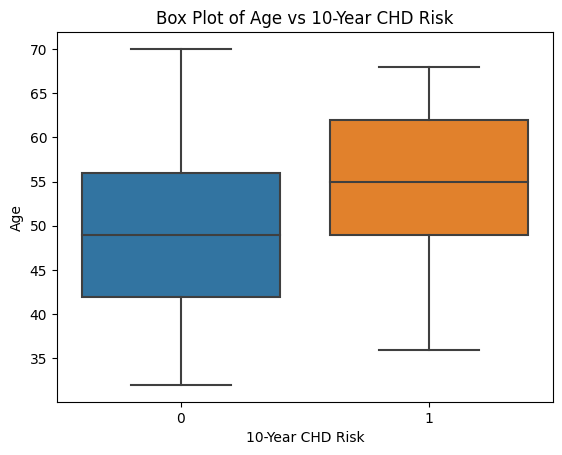

In [162]:
sns.boxplot(x='diabetes', y='age', data=heart_disease)
plt.title('Box Plot of Age vs 10-Year CHD Risk')
plt.xlabel('10-Year CHD Risk')
plt.ylabel('Age')
plt.show()

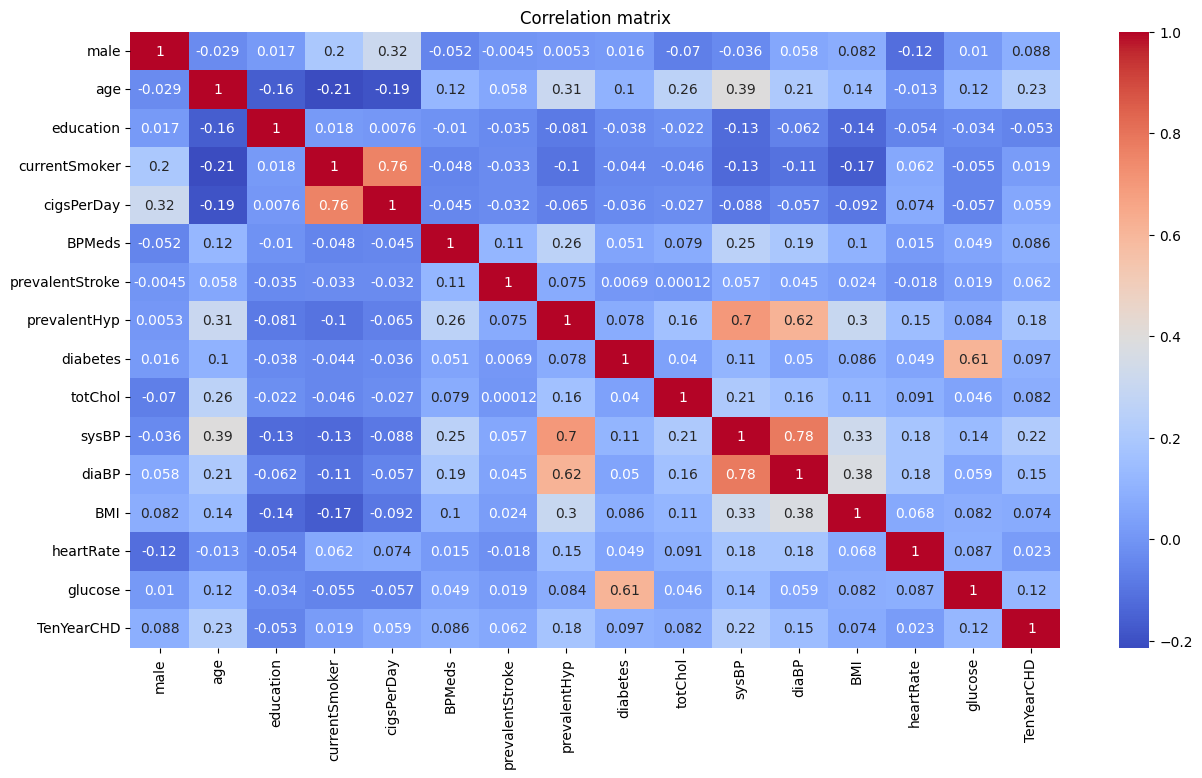

In [163]:
plt.figure(figsize=(15,8))
corr_mx=heart_disease.corr()
sns.heatmap(corr_mx,annot=True,cmap='coolwarm')
plt.title("Correlation matrix")
plt.show()

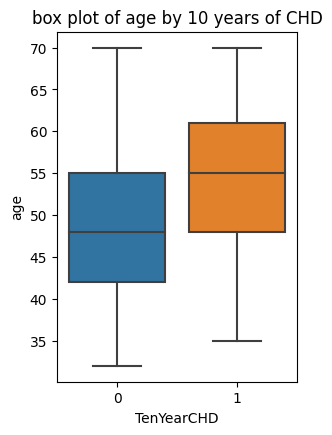

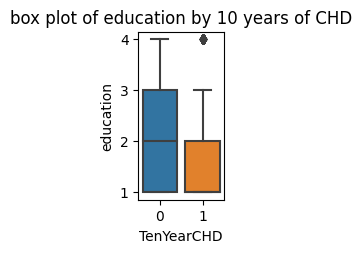

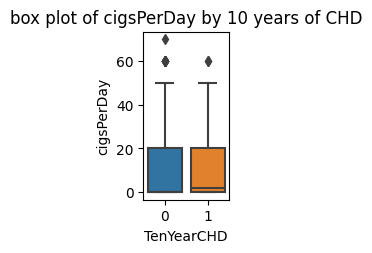

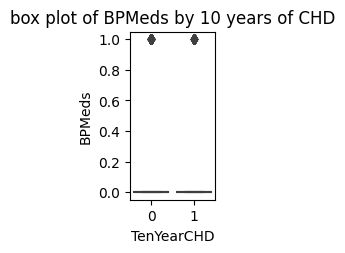

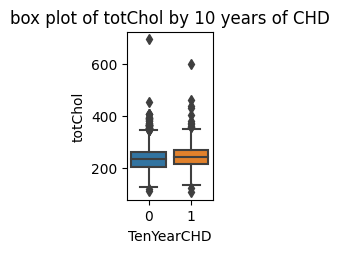

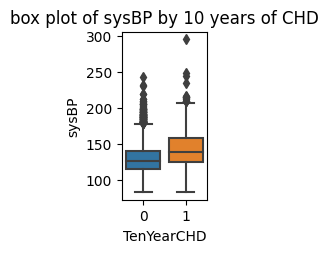

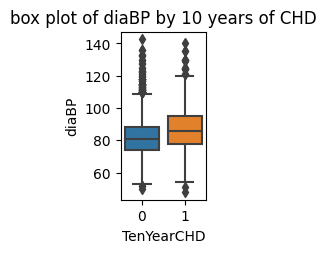

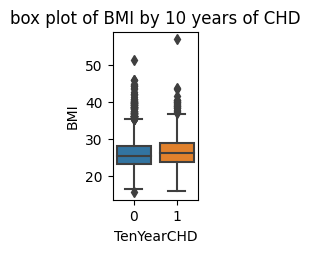

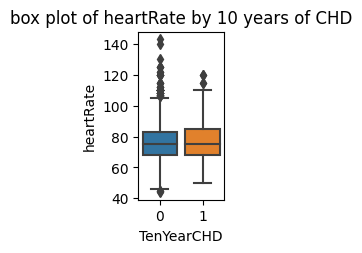

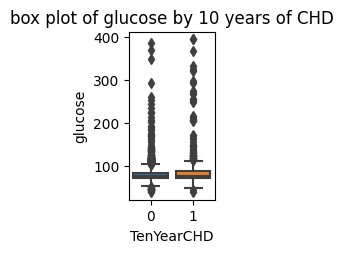

In [164]:
#analyze risk factors
plotnum=1
plt.figure(figsize=(18,10))
for features in num_features:
    if plotnum<=10:
        #plt.figure(figsize=(18,10))
        ax=plt.subplot(2,5,plotnum)
        sns.boxplot(x='TenYearCHD',y=features,data=heart_disease)
        
        plt.title(f'box plot of {features} by 10 years of CHD')
        plt.ylabel(f'{features}')
        plt.xlabel('TenYearCHD')
        plt.show()

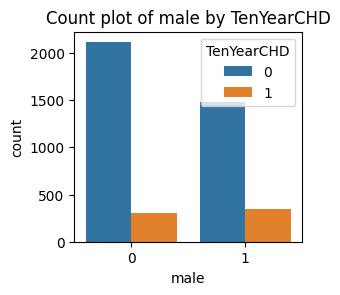

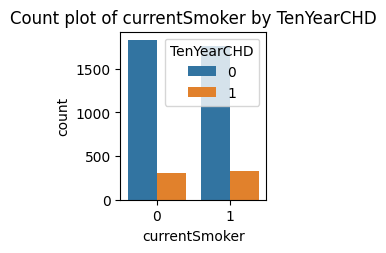

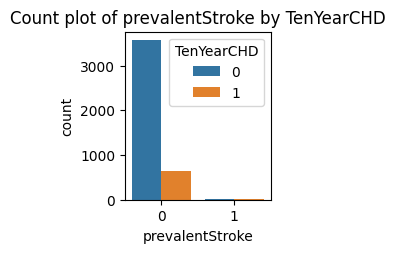

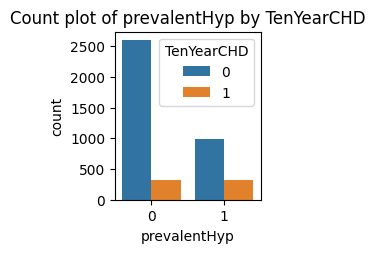

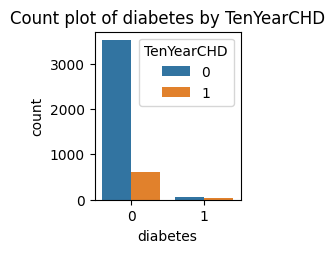

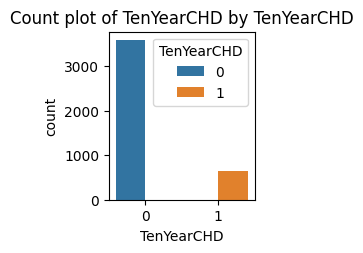

In [165]:
#distribution of categorical features by count plot
plot_num=1
plt.figure(figsize=(10,6))
for i in cat_features:
    if plot_num<=6:
        ax=plt.subplot(2,3,plot_num)
        sns.countplot(x=i,hue='TenYearCHD',data=heart_disease)
        plt.title(f'Count plot of {i} by TenYearCHD')
        plt.show()

# step 3 : Model Training

In [166]:
X=heart_disease.drop('TenYearCHD',axis=1)
Y=heart_disease['TenYearCHD']

In [167]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [168]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42)
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)



LogisticRegression()

# Step 4:Model Evaluation

In [169]:
y_test

3188    0
764     0
3264    0
1967    0
2185    0
       ..
3303    1
4056    0
4210    0
3971    0
2540    0
Name: TenYearCHD, Length: 848, dtype: int64

In [170]:
y_pred=logistic_model.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


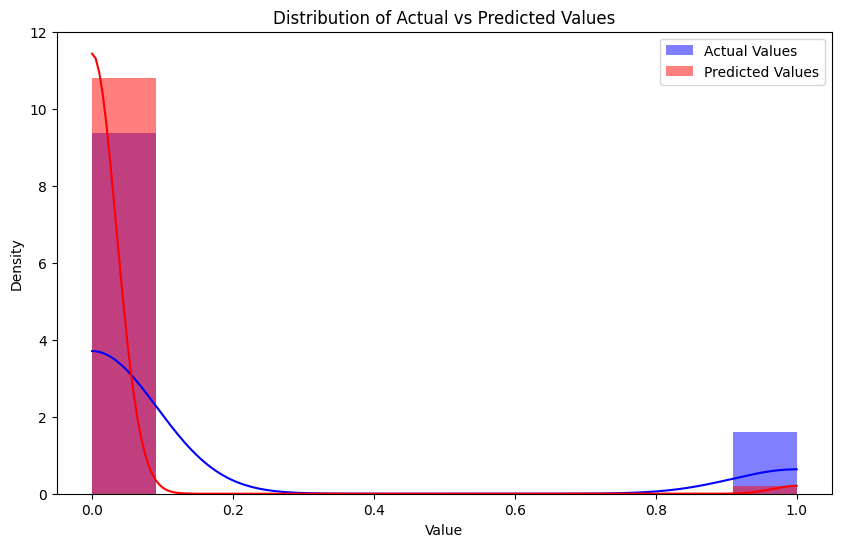

In [171]:
plt.figure(figsize=(10, 6))
sns.histplot(y_test, color='blue', label='Actual Values', kde=True, stat="density", linewidth=0)
sns.histplot(y_pred, color='red', label='Predicted Values', kde=True, stat="density", linewidth=0)
plt.xlabel('Value')
plt.title('Distribution of Actual vs Predicted Values')
plt.legend()
plt.show()

In [172]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred)
cr=classification_report(y_test,y_pred)
accuracy=accuracy_score(y_test,y_pred)

print("Accuracy : {:.2f} %".format(accuracy.mean()*100))
print('Confusion Matrix:{}'.format(cm))
print('Classification report:{}'.format(cr))

Accuracy : 85.73 %
Confusion Matrix:[[718   6]
 [115   9]]
Classification report:              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



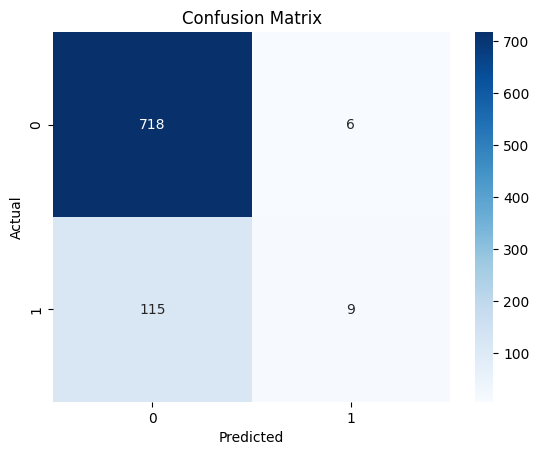

In [173]:
# Plot the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True,fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()

# Step 6:Conclusion

# # The model has a high overall accuracy (85.73%), which can be misleading due to the imbalance in the dataset (more instances of class 0 than class 1).
# 1.Performance on Negative Class (Class 0):
# -The model performs exceptionally well on the negative class with high precision (0.86), recall (0.99), and F1-score (0.92).
# 2.Poor Performance on Positive Class (Class 1):
# -The model performs poorly on the positive class with low precision (0.60), very low recall (0.07), and low F1-score (0.13). 
# -The recall for class 1 is particularly concerning, indicating that the model misses many true positive cases (high FN rate).

# 3.The dataset is imbalanced (724 instances of class 0 vs. 124 instances of class 1). This imbalance impacts the model’s performance, leading to a bias towards the majority class (class 0).